In [1]:
from keras.utils.np_utils import to_categorical
import keras
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
x_train = []
y_train = []

for dir in os.listdir("train"):
    if dir == ".DS_Store":
        continue
        
    dir1 = "train/" + dir
    label = 0
    
    if dir == "cat":
        label = 0
    elif dir == "dog":
        label = 1
        
    for file in os.listdir(dir1):
        if file != ".DS_Store":
            y_train.append(label)
            filepath = dir1 + "/" + file
            image = np.array(Image.open(filepath).resize((150, 150)))
            image = image.astype("float32")
            x_train.append(image / 255.)
            
x_train = np.array(x_train)
Y_train = to_categorical(y_train)

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [4]:
from keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])

In [5]:
x_test = []
y_test = []

for dir in os.listdir("test"):
    if dir == ".DS_Store":
        continue
        
    dir2 = "test/" + dir
    label = 0
    
    if dir == "cat":
        label = 0
    elif dir == "dog":
        label = 1
        
    for file in os.listdir(dir2):
        if file != ".DS_Store":
            y_test.append(label)
            filepath = dir2 + "/" + file
            image = np.array(Image.open(filepath).resize((150, 150)))
            image = image.astype("float32")
            x_test.append(image / 255.)
            
x_test = np.array(x_test)
Y_test = to_categorical(y_test)

In [6]:
batch_size = 32
epochs = 20
history = model.fit(x_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=2,
                            validation_split=0.1
                            )

Train on 1800 samples, validate on 200 samples
Epoch 1/20
2s - loss: 0.6898 - acc: 0.5589 - val_loss: 0.7098 - val_acc: 0.4450
Epoch 2/20
1s - loss: 0.6534 - acc: 0.6256 - val_loss: 0.6389 - val_acc: 0.5750
Epoch 3/20
1s - loss: 0.5903 - acc: 0.6822 - val_loss: 0.8836 - val_acc: 0.4500
Epoch 4/20
1s - loss: 0.5380 - acc: 0.7183 - val_loss: 0.9841 - val_acc: 0.4450
Epoch 5/20
1s - loss: 0.4940 - acc: 0.7628 - val_loss: 0.9985 - val_acc: 0.4300
Epoch 6/20
1s - loss: 0.4526 - acc: 0.7844 - val_loss: 0.4692 - val_acc: 0.7550
Epoch 7/20
1s - loss: 0.4112 - acc: 0.8211 - val_loss: 0.6238 - val_acc: 0.6900
Epoch 8/20
1s - loss: 0.3504 - acc: 0.8367 - val_loss: 1.1431 - val_acc: 0.4700
Epoch 9/20
1s - loss: 0.3172 - acc: 0.8600 - val_loss: 1.0594 - val_acc: 0.5550
Epoch 10/20
1s - loss: 0.2626 - acc: 0.8833 - val_loss: 0.9682 - val_acc: 0.6450
Epoch 11/20
1s - loss: 0.2097 - acc: 0.9217 - val_loss: 0.8133 - val_acc: 0.6800
Epoch 12/20
1s - loss: 0.1802 - acc: 0.9289 - val_loss: 1.0684 - val_ac

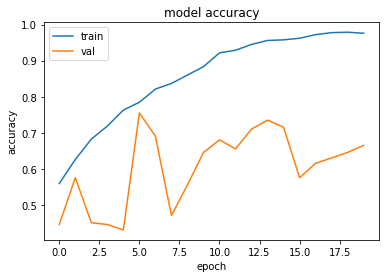

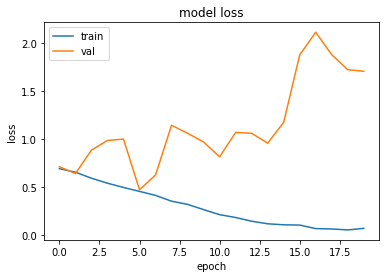

In [7]:
#正答率
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
_, acc = model.evaluate(x_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.7375
